In [22]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("experiments/ghz_basic.csv")

In [23]:


# Convert relevant columns to numeric types
data['avg_runtime'] = pd.to_numeric(data['avg_runtime'])
data['avg_swap_count'] = pd.to_numeric(data['avg_swap_count'])
data['avg_depth'] = pd.to_numeric(data['avg_depth'])


In [24]:


# Group the data by 'num_qubits' and 'layout_trials', selecting only numeric columns
grouped_data = data.groupby(['num_qubits', 'layout_trials'])[['avg_runtime', 'avg_swap_count', 'avg_depth']].mean().reset_index()

# Extract unique values for layout_trials and num_qubits
layout_trials = grouped_data['layout_trials'].unique()
num_qubits = grouped_data['num_qubits'].unique()

# Create dictionaries to store data for each qubit count
swap_counts = {q: [] for q in num_qubits}
runtimes = {q: [] for q in num_qubits}
depths = {q: [] for q in num_qubits}

# Populate the dictionaries
for q in num_qubits:
    swap_counts[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_swap_count'].tolist()
    runtimes[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_runtime'].tolist()
    depths[q] = grouped_data[grouped_data['num_qubits'] == q]['avg_depth'].tolist()


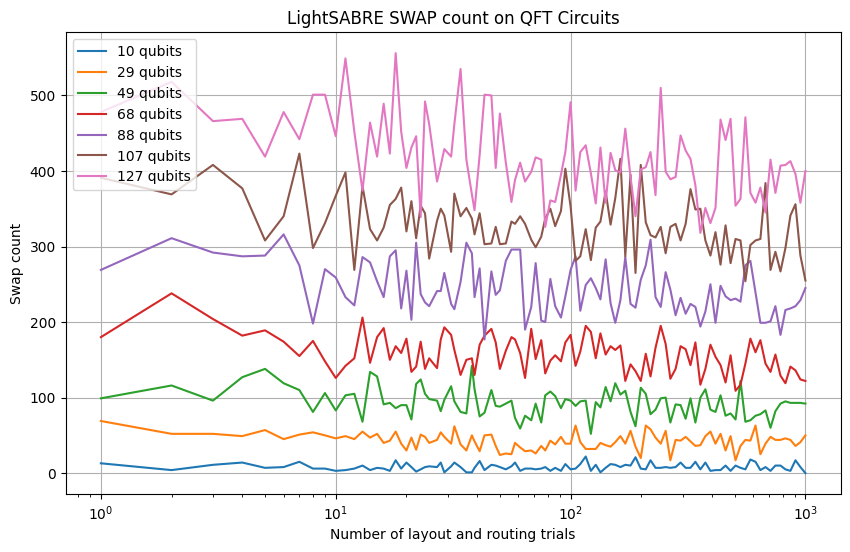

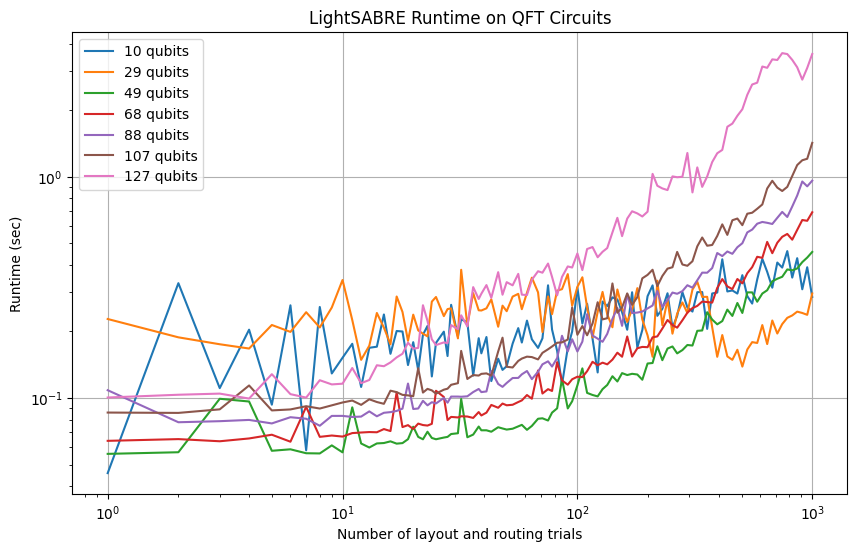

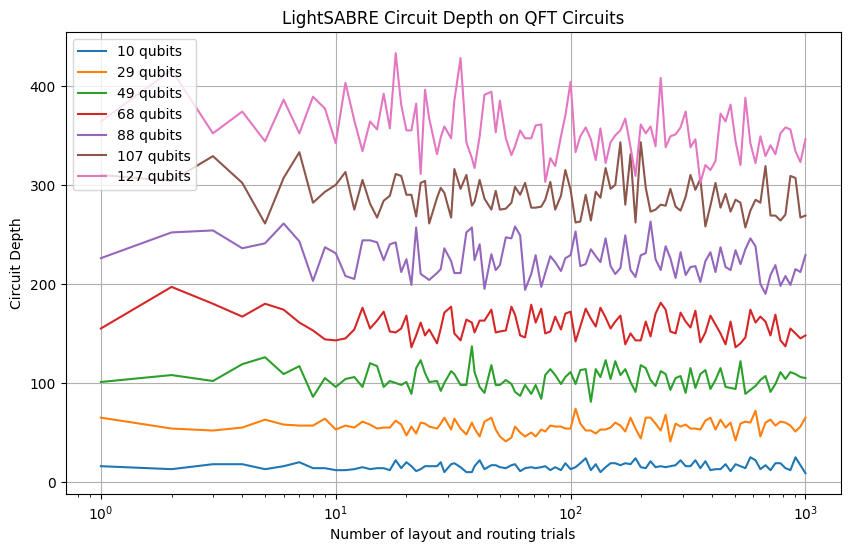

In [25]:
import matplotlib.pyplot as plt

# Plot Swap Count vs Layout Trials
plt.figure(figsize=(10, 6))
for q in num_qubits:
    plt.plot(layout_trials, swap_counts[q], label=f'{q} qubits')
plt.xscale('log')
plt.xlabel('Number of layout and routing trials')
plt.ylabel('Swap count')
plt.title('LightSABRE SWAP count on QFT Circuits')
plt.legend()
plt.grid(True)
plt.show()

# Plot Runtime vs Layout Trials
plt.figure(figsize=(10, 6))
for q in num_qubits:
    plt.plot(layout_trials, runtimes[q], label=f'{q} qubits')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of layout and routing trials')
plt.ylabel('Runtime (sec)')
plt.title('LightSABRE Runtime on QFT Circuits')
plt.legend()
plt.grid(True)
plt.show()

# Plot Depth vs Layout Trials
plt.figure(figsize=(10, 6))
for q in num_qubits:
    plt.plot(layout_trials, depths[q], label=f'{q} qubits')
plt.xscale('log')
plt.xlabel('Number of layout and routing trials')
plt.ylabel('Circuit Depth')
plt.title('LightSABRE Circuit Depth on QFT Circuits')
plt.legend()
plt.grid(True)
plt.show()